In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Import CSV with pandas
data = pd.read_csv("C:\\Users\\Jehanne\\Desktop\\RTU\\Telecommunication Software\\Report 1\\SDN_traffic.csv")

In [6]:
## Let's analyze the data roughly

print("\n\n\n###### Shape : ")
print(data.shape)

print("\n\n\n###### Columns : ")
print(data.columns)

print("\n\n\n###### Their type : ")
pd.set_option('display.max_rows', None) #by default it will only show a handful so I change it to see them all
print(data.dtypes)
pd.set_option('display.max_rows',10)

print("\n\n\n###### First values : ")
print(data.head())

print("\n\n\n###### Statistics : ")
print(data.describe())




###### Shape : 
(4234, 65)



###### Columns : 
Index(['id_flow', 'nw_src', 'tp_src', 'nw_dst', 'tp_dst', 'nw_proto',
       'forward_pc', 'forward_bc', 'forward_pl', 'forward_piat', 'forward_pps',
       'forward_bps', 'forward_pl_mean', 'forward_piat_mean',
       'forward_pps_mean', 'forward_bps_mean', 'forward_pl_var',
       'forward_piat_var', 'forward_pps_var', 'forward_bps_var',
       'forward_pl_q1', 'forward_pl_q3', 'forward_piat_q1', 'forward_piat_q3',
       'forward_pl_max', 'forward_pl_min', 'forward_piat_max',
       'forward_piat_min', 'forward_pps_max', 'forward_pps_min',
       'forward_bps_max', 'forward_bps_min', 'forward_duration',
       'forward_size_packets', 'forward_size_bytes', 'reverse_pc',
       'reverse_bc', 'reverse_pl', 'reverse_piat', 'reverse_pps',
       'reverse_bps', 'reverse_pl_mean', 'reverse_piat_mean',
       'reverse_pps_mean', 'reverse_bps_mean', 'reverse_pl_var',
       'reverse_piat_var', 'reverse_pps_var', 'reverse_bps_var',
       're

In [16]:
## Now that we have a better view of the data, we can manipulate it.
## The data is already nicely formatted so not many operations are necessary.

print(data["category"].unique())


data_category = data.groupby("category")[["tp_dst", "forward_size_packets", "reverse_size_packets"]].sum().reset_index()
data_id_src = data.groupby("nw_src")[["tp_dst", "forward_size_packets", "reverse_size_packets"]].sum().reset_index()
data_id_dst = data.groupby("nw_dst")[["tp_dst", "forward_size_packets", "reverse_size_packets"]].sum().reset_index()


print("\n\n\n###### per category : ")
print(data_category.head())

print("\n\n\n###### per source : ")
print(data_id_src.head())

print("\n\n\n###### per destination : ")
print(data_id_dst.head())

print("\n\n\n###### stats per category : ")
print(data_category.describe())

print("\n\n\n###### stats per source : ")
print(data_id_src.describe())

print("\n\n\n###### stats per destination : ")
print(data_id_dst.describe())

['WWW' 'DNS' 'VOIP' 'ICMP' 'FTP' 'P2P']



###### per category : 
  category    tp_dst  forward_size_packets  reverse_size_packets
0      DNS     75713             296924721               9044166
1      FTP    208803           16731539682             382059857
2     ICMP    625608            6164534717             176377710
3      P2P  31405590             263289124               6465986
4     VOIP   1527226            3399064747              82085318



###### per source : 
        nw_src  tp_dst  forward_size_packets  reverse_size_packets
0  1.01136E+11   38705                     0                     3
1  1.02129E+11   50275                     0                     1
2  1.02134E+11   60309                     0                     2
3  1.02165E+11   37945                     0                     1
4  1.02222E+11  145385                     0                     5



###### per destination : 
        nw_dst  tp_dst  forward_size_packets  reverse_size_packets
0  1.04198E+11     886

Text(0, 0.5, 'données')

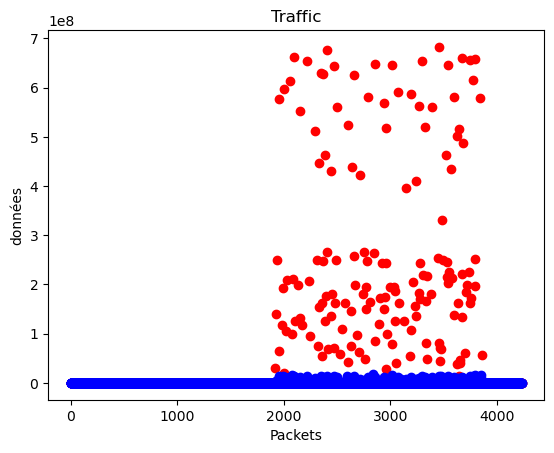

In [27]:
#Some matplotlib graphs:

plt.scatter(np.arange(0, len(data)), data["forward_size_packets"], color = "r", label="forward")
plt.scatter(np.arange(0, len(data)), data["reverse_size_packets"], color = "b", label="reverse")
plt.title("Traffic")
plt.xlabel("Packets")
plt.ylabel("données")



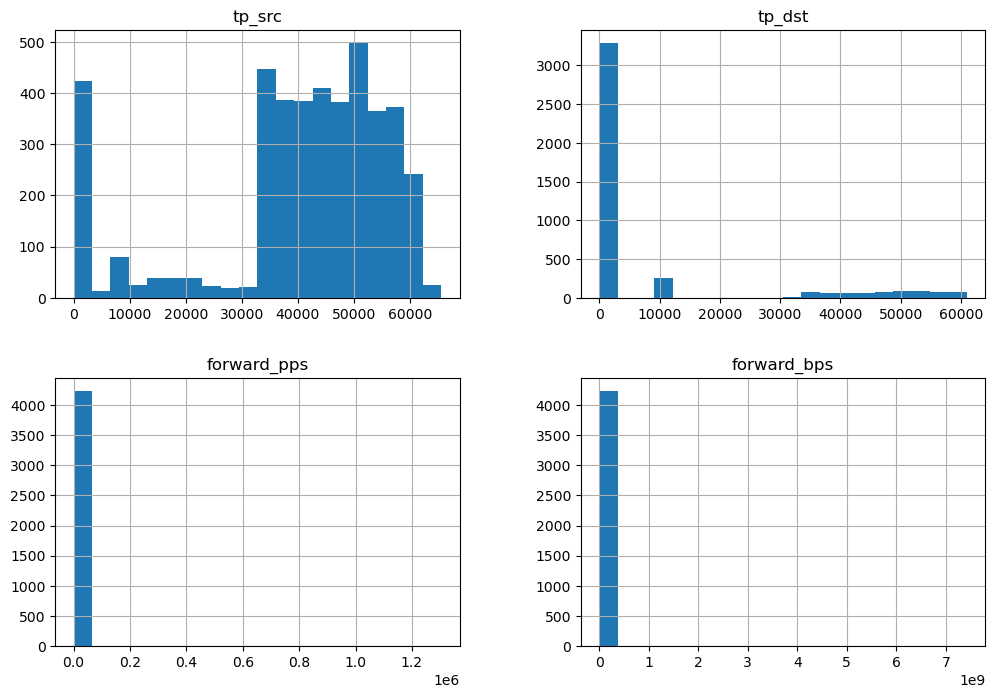

In [19]:
data.hist(column=['tp_src', 'tp_dst', 'forward_pps', 'forward_bps'], bins=20, figsize=(12, 8))
plt.show()

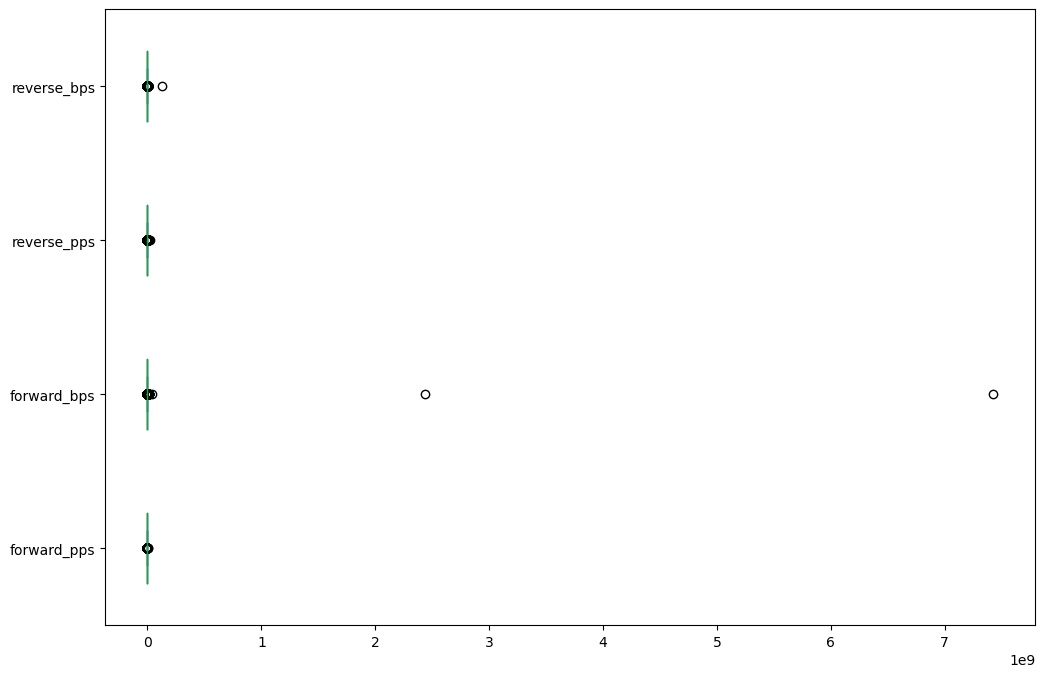

In [20]:
data[['forward_pps', 'forward_bps', 'reverse_pps', 'reverse_bps']].plot(kind='box', vert=False, figsize=(12, 8))
plt.show()


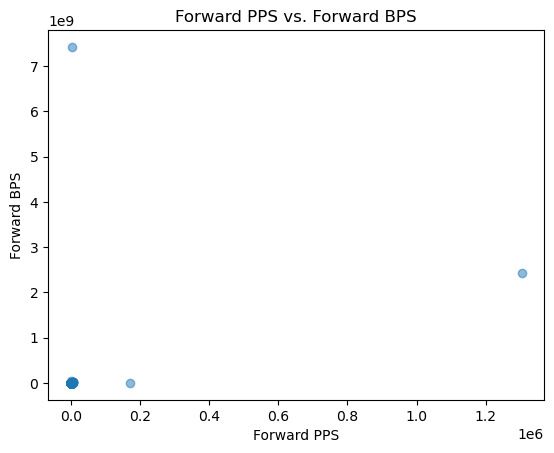

In [21]:
plt.scatter(data['forward_pps'], data['forward_bps'], alpha=0.5)
plt.title('Forward PPS vs. Forward BPS')
plt.xlabel('Forward PPS')
plt.ylabel('Forward BPS')
plt.show()


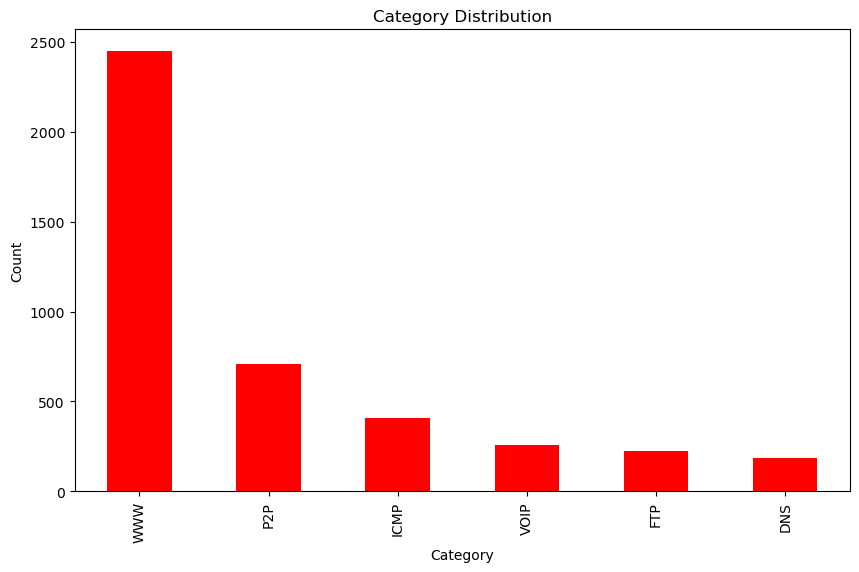

In [26]:
category_counts = data['category'].value_counts()
category_counts.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
